# Support vector machines (SVM)
### Pros:
1. **Effective in High-Dimensional Spaces**: Works well when the number of features is large.
2. **Robust to Overfitting**: Especially useful in small datasets.
3. **Works with Non-Linear Data**: Through the use of kernels.
4. **Maximizes Margin**: Ensures better generalization.

### Cons:
1. **Computationally Expensive**: Training time increases with large datasets.
2. **Difficult to Tune**: Kernel and hyperparameter selection can be complex.
3. **Requires Feature Scaling**: Sensitive to different feature scales.
4. **Less Interpretable**: Harder to understand compared to decision trees.

In [13]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import mglearn

Text(0, 0.5, 'Feature 1')

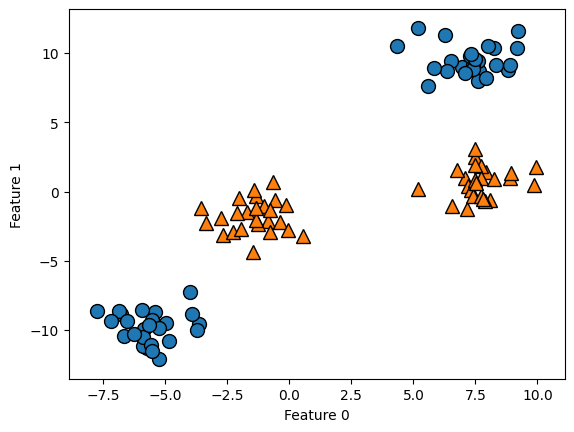

In [14]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

For this dataset a linear model will not due a good job. Kernelized SVM tricks is, in short, sending the features to a higher dimentsional space where the features will be better divided by a linear model.

Text(0, 0.5, 'Feature 1')

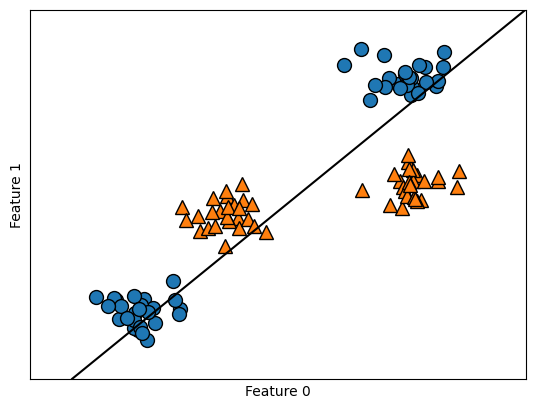

In [15]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding feature1 ** 2, the square of the second feature, as a new feature. Instead of representing each data point as a two-dimensional point, (feature0, feature1), we now represent it as a three-dimensional point, (feature0, feature1, feature1 ** 2).

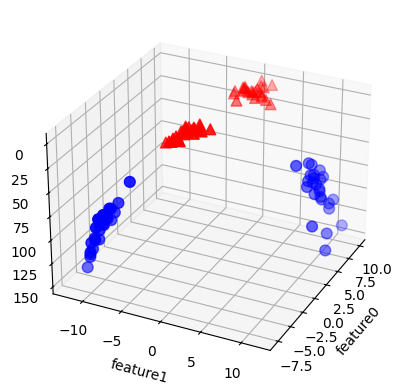

In [16]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D
figure = plt.figure()
# Create a 3D subplot and set the view angles
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)

# Plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

plt.show()


In the new representation of the data, it is now indeed possible to separate the two classes using a linear model, a plane in three dimensions

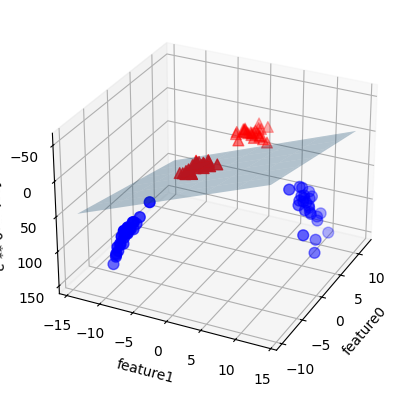

In [18]:
from sklearn.svm import LinearSVC

# Fit a linear SVM on the modified data
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# Show linear decision boundary
figure = plt.figure()
ax = figure.add_subplot(111, projection='3d')
ax.view_init(elev=-152, azim=-26)

# Create a grid to plot the decision boundary
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]

# Plot the decision boundary surface
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

# Plot the data points
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', s=60)

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

plt.show()


As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse, as you can see from the plot created here:

Text(0, 0.5, 'Feature 1')

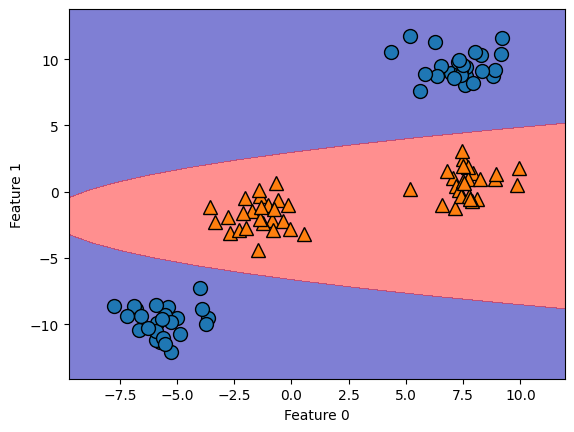

In [19]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Understanding SVMs
During training, the SVM learns how important each of the training data points is torepresent the decision boundary between the two classes. Typically only a subset ofthe training points matter for defining the decision boundary: the ones that lie on the border between the classes. These are called support vectors and give the support vector machine its name.

To make a prediction for a new point, the distance to each of the support vectors is measured. A classification decision is made based on the distances to the support vector, and the importance of the support vectors that was learned during training (stored in the dual_coef_ attribute of SVC). The distance between data points is measured by the Gaussian kernel:
$`krbf(x1, x2) = exp (ɣǁx1 - x2ǁ2)`$

Here, x1 and x2 are data points, ǁ x1 - x2 ǁ denotes Euclidean distance, and ɣ (gamma) is a parameter that controls the width of the Gaussian kernel.

Text(0, 0.5, 'Feature 1')

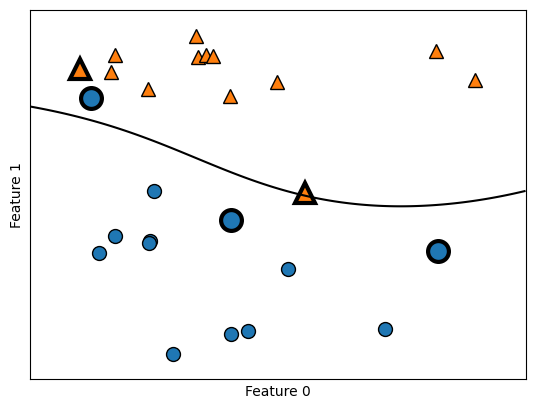

In [20]:
# Result of training a support vector machine on a twodimensional two-class dataset. 
# The decision boundary is shown in black, and the support vectors are larger points with the wide outline
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### SVM parameters

##### Gamma and C
The gamma parameter is the one shown in the formula given in the previous section, which controls the width of the Gaussian kernel. It determines the scale of what it means for points to be close together. The C parameter is a regularization parameter, similar to that used in the linear models. It limits the importance of each point (or more precisely, their dual_coef_).

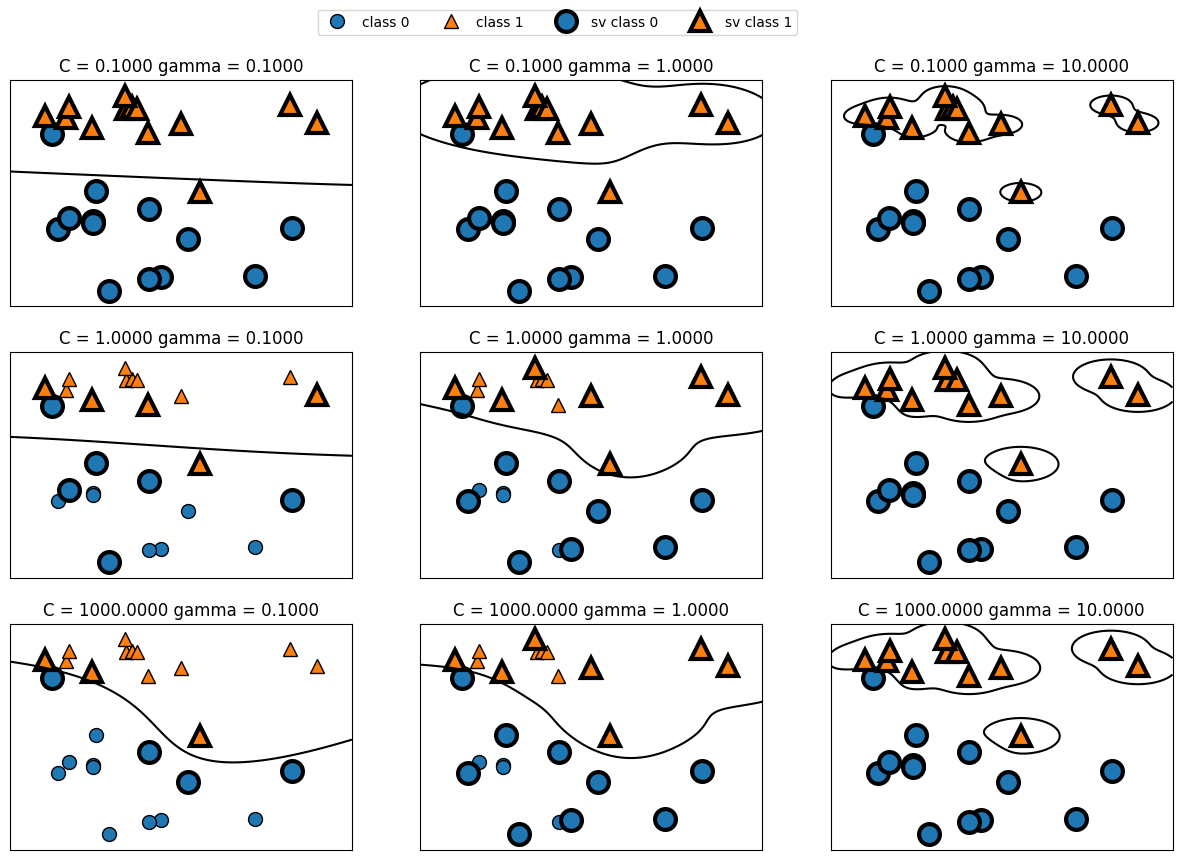

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
ncol=4, loc=(.9, 1.2))

#### Applying RBF Kernel in the cnacer dataset

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
svc = SVC(kernel='rbf', C=1, gamma=0.1)
svc.fit(X_train, y_train)
print(f"Accuracy on training set: {svc.score(X_train, y_train):.2f}")
print(f"Accuracy on test set: {svc.score(X_test, y_test):.2f}")

Accuracy on training set: 1.00
Accuracy on test set: 0.63


Kernel RBF overfits completly

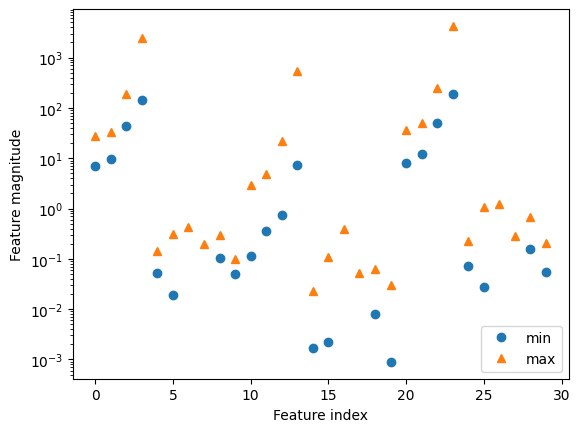

In [26]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")